In [1]:
import gym

import sigma_graph
from simple_figure8squad import print_agents, print_lookup

### Step #1.

Initiate an environment instance by calling 'make' function in gym. The default scenario here is 'figure8squad-v3'. Use 'sigma_graph:figure8squad-v3' instead if you don't want to explicitly 'import sigma_graph'.

Check './simple_figure8squad.py' to find all config arguments in the init stage for this environment.

In [2]:
outer_configs = {"env_path": '../', "n_red": 2, "n_blue": 1, "max_step": 20, "init_health": 10,
                 "threshold_damage_2_red": 3, "threshold_damage_2_blue": 5, "log_on": True}

env = gym.make('figure8squad-v3', **outer_configs)
print(f"Shape of the observation space for each agent: {env.state_shape}")
print("\nEnv configs:", env.configs)

Shape of the observation space for each agent: 93

Env configs: {'init_health': 20, 'env_path': '../', 'map_id': 'S', 'load_pickle': True, 'obs_embed': False, 'obs_dir': True, 'obs_team': True, 'obs_sight': True, 'damage_threshold_red': 5, 'damage_threshold_blue': 3, 'init_red': [{'learn': True, 'pos': None, 'dir': None}, {'learn': True, 'pos': None, 'dir': None}], 'init_blue': [{'learn': False, 'route': '0', 'idx': 0}], 'damage_step': 1, 'route_lookup': ['0']}


### Step #2.

Once an instance of a Gym environment has been generated, an initial 'reset()' is required before calling 'step([list_of_actions_for_each_agent])' function. The return value of the reset function in this multi-agent setting is the observation states for all learning agents. In the 'figure8squad-v0' env, the states represent team red by default.

When the logger is on, verbose log info will be generated for later use (i.e., evaluation and visualization) each time the 'step' function is called. The "log_on" in environment config is 'False' by default in training mode.

In [3]:
obs = env.reset()

# print initial states before executing actions
print_agents(env)

print(f"\nInitial full observations:\n{obs}")

Step #0/10

### Team blue has 1 agent(s)
Agent blue #0 at index_in_route #0 @node: <24> dir: <1:'N'> health: <20> death_step: <-1>

### Team red has 2 agent(s)
Agent red #0 @node: <1> dir: <2:'S'> health: <20> damage: <0>
mask: [False False  True False  True False False False]
obs: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 1.0, 0.0, 0.0, False, False, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0, 0.0, 0.0, 1.0, False, False, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Agent red #1 @node: <10> dir: <1:'N'> health: <20> damage: <0>
mask: [False False  True  True False False False False]
obs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.0, 0.0, 0.0, True, True, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0.0, 0.0, 0.0, 1.0, False, False, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Step #3.

Execute 'step' function with valid actions for all learnable agents. The inputs are branched discrete actions \[ \[Move, Turn\], ..\] for each agent. A valid 'Move' action is in a range of \[0,1,2,3,4\] and a 'Turn' action is in \[0,1,2\]

In [4]:
print_lookup()

'Move' actions:  {0: 'NOOP', 1: 'N', 2: 'S', 3: 'W', 4: 'E'}
'Turn' actions:  {0: 'NOOP', 1: 'TURN_LEFT_90', 2: 'TURN_RIGHT_90'}


To get a valid action in this test run, please check the 'invalid_action_mask' in the agent info below to avoid the runtime assertion caused by invalid actions. Otherwise, you can also turn off the action mask by adding {"act_masked": True} in the configs during init stage.

Repeatedly run the 'step' function block below until reaching to 'max_step' for an episode. The 'done' indicators will become 'True' at this time. The environment can continuously run more steps, however, you should manually 'reset' the env to start a new episode in order to receive meaningful end of episode rewards.

In [15]:
# provide actions for all learning agents in the format [[Move, Turn], ... ,[Move, Turn]]
actions = [[0, 1], [0, 2]]
obs, rew, done, _ = env.step(actions)

print_agents(env)
print(f"\nStep rewards:{rew} | done: {done}")
# print("Observations:", obs)

Step #10/10

### Team blue has 1 agent(s)
Agent blue #0 at index_in_route #10 @node: <5> dir: <1:'N'> health: <12> death_step: <4>

### Team red has 2 agent(s)
Agent red #0 @node: <1> dir: <3:'W'> health: <18> damage: <3>
mask: [False False  True False  True False False False]
obs: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 1.0, 0.0, False, False, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.0, 0.0, 0.0, False, False, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Agent red #1 @node: <6> dir: <4:'E'> health: <20> damage: <5>
mask: [False  True  True False False False False False]
obs: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0, 0.0, 0.0, 1.0, False, False, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0.0, 0.0, 0.0, False, False, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

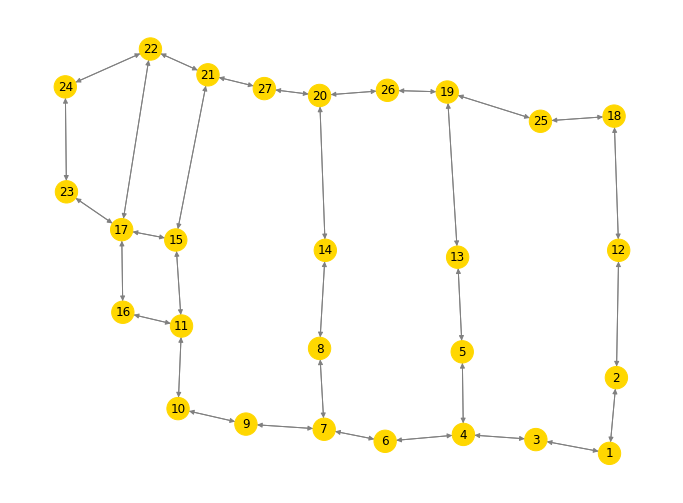

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

fig = plt.figure(frameon=False, figsize=(12, 9), facecolor='none')
plt.axis('off')
col_map = ["gold"] * len(env.map.n_info)

nx.draw_networkx(env.map.g_acs, env.map.n_info, node_color=col_map,
                 node_size=500, edge_color="grey", arrows=True)
# plt.savefig("{}move_dpi{}.png".format(pic_dir, save_dpi), dpi=save_dpi)